In [1]:
pip install keras

In [2]:
pip install tensorflow

In [34]:
from keras import Sequential
from keras.layers import Dense

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
dataset= pd.read_csv(io.BytesIO(uploaded['churn.csv']))

Saving churn.csv to churn.csv


In [41]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [42]:
dataTypeSeries = dataset.dtypes
dataTypeSeries

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Exercise:
1. Encoding categorical data
2. Split X, Y
3. Delte customerID
4. Scale X data with standardScalar
5. Splitting Train Test using Testing data = 30%
6. Design ANN Architecture
7. Complie and Fit model
8. Show confusitin matrix
9. Plot graph to compare training accruacy and validate accuracy 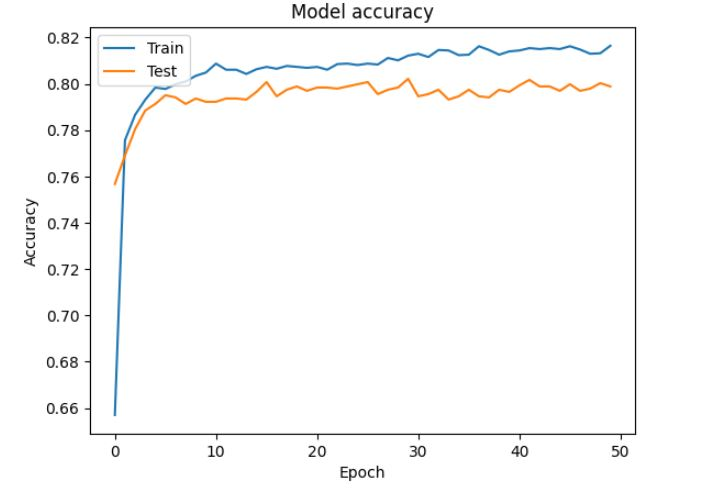



# Exercise:
To find and select the Classification dataset from https://www.kaggle.com/datasets?tags=13302-Classification
Let's classify!!!!

In [43]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [45]:
# Delte customerID
import pandas as pd

dataset.drop('customerID',axis=1,inplace=True) # ลบ Columnb

In [53]:
# Encoding categorical data
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn import preprocessing

df = pd.DataFrame(dataset)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
df





,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


In [82]:
# Split X, Y
from keras import Sequential
from keras.layers import Dense

X = df.iloc[:, 0:19]
Y = df.iloc[:, 19]

In [83]:
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [84]:
# Scale X data with standardScalar
from sklearn.preprocessing import StandardScaler  #แปลงข้อมูล (transform data)
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.13176632
  -0.39860759]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.38773977
  -0.94876238]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.51731743
  -1.64188328]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.14221613
  -0.13968008]
 [ 0.99053183  2.27315869  1.03453023 ...  1.33486261  0.23297901
  -0.31653445]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.47405205  1.4723266
   1.13801338]]


In [85]:
from sklearn.model_selection import train_test_split   # ต้องมีการแปลง train test

In [86]:
# Splitting Train Test using Testing data = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((4930, 19), (2113, 19))

In [87]:
print(X_train)

[[-1.00955867 -0.43991649 -0.96662231 ...  1.33486261  0.1723701
   1.03423057]
 [ 0.99053183 -0.43991649  1.03453023 ...  0.39855772  0.55692315
  -1.54233651]
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -0.72004377
  -0.27576264]
 ...
 [ 0.99053183 -0.43991649  1.03453023 ...  1.33486261 -1.33658262
  -1.541807  ]
 [ 0.99053183  2.27315869 -0.96662231 ...  0.39855772  0.05533222
   1.16131156]
 [-1.00955867 -0.43991649 -0.96662231 ... -0.53774716 -1.35121235
   1.67546007]]


In [88]:
print(Y_train)


3580    1
2364    0
6813    1
789     0
561     0
       ..
4931    0
3264    0
1653    0
2607    1
2732    0
Name: Churn, Length: 4930, dtype: int64


In [89]:
from keras import Sequential
from keras.layers import Dense

In [100]:
# Design ANN Architecture
classifier = Sequential()

#Input Layer and First Hidden Layer
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal', input_dim=19))    # Dense = Fully connected ( Fully Mesh )


#Second Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#output = activation(dot(input, kernel) + bias)

In [101]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 40        
                                                                 
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
# Complie and Fit model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
493/493 [==============================] - 2s 3ms/step - loss: 0.5351 - accuracy: 0.7331 - val_loss: 0.4683 - val_accuracy: 0.7383
Epoch 2/50
493/493 [==============================] - 1s 3ms/step - loss: 0.4554 - accuracy: 0.7331 - val_loss: 0.4574 - val_accuracy: 0.7383
Epoch 3/50
493/493 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.7373 - val_loss: 0.4489 - val_accuracy: 0.7847
Epoch 4/50
493/493 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.7972 - val_loss: 0.4444 - val_accuracy: 0.7913
Epoch 5/50
493/493 [==============================] - 2s 4ms/step - loss: 0.4306 - accuracy: 0.7986 - val_loss: 0.4425 - val_accuracy: 0.7922
Epoch 6/50
493/493 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8004 - val_loss: 0.4401 - val_accuracy: 0.7922
Epoch 7/50
493/493 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.7990 - val_loss: 0.4392 - val_accuracy: 0.7941
Epoch 

In [104]:
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.4141325354576111
Train accuracy :  0.8014198541641235


In [105]:
score1 = classifier.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.4328097999095917
Test accuracy :  0.7969711422920227


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


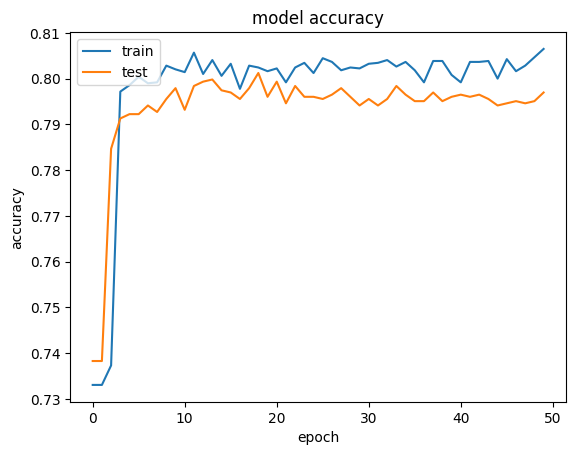

In [106]:
# Plot graph to compare training accruacy and validate accuracy
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [107]:
classifier.save("churn_model.h5")
print("Saved model.")

Saved model.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [108]:
# Show confusitin matrix
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)


67/67 [==============================] - 0s 2ms/step


In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[1370  190]
 [ 239  314]]


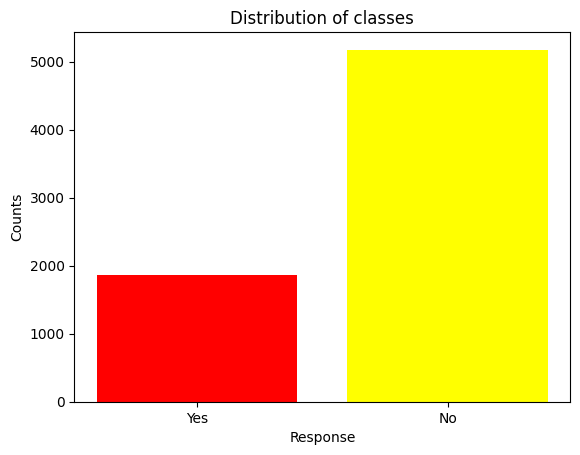

In [119]:
import matplotlib.pyplot as plt
import numpy as np

x_grap =  df['Churn']

list_X = []

for i in x_grap:
  list_X.append(i)

labels = ['Yes' if val == 0 else 'No' for val in list_X]

counts = [labels.count('No'), labels.count('Yes')]

plt.bar(['Yes','No'],counts,color=['red','yellow'])

plt.xlabel('Response')
plt.ylabel('Counts')
plt.title('Distribution of classes')

plt.show()